# NYC Motor Collisions Analysis

In New York City (NYC), police officers document vehicle crash incidents on a daily basis. The police officers record the date, time, location, number of casualities, causes of crash, and types of vehicles. The data in the records are then uploaded regularly to the [NYC Open Data portal](https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Crashes/h9gi-nx95). The dataset used in this analysis was downloaded on 9/27/2022, so any later versions might reflect different findings from the those shown here.

There are 3 main objectives in this analysis:
1. What zip codes have the highest crash rates?
2. What times of the day have the highest crash rates?
3. Is it suitable to use a random forest model to predict the total number of casualities (including fatalities) based on the time of day, month of year, and zip code?

Any opinion or statement in this analysis is my own and does not represent the opinion of the NYC Police Department, any department of the NYC government, or my previous employers.

In [1]:
#Set up working environment
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

## Data Processing and Cleaning

In [2]:
dataset = pd.read_csv('Motor_Vehicle_Collisions_-_Crashes.csv')

c:\users\zoo-b\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3553: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1930593 entries, 0 to 1930592
Data columns (total 29 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   CRASH DATE                     object 
 1   CRASH TIME                     object 
 2   BOROUGH                        object 
 3   ZIP CODE                       object 
 4   LATITUDE                       float64
 5   LONGITUDE                      float64
 6   LOCATION                       object 
 7   ON STREET NAME                 object 
 8   CROSS STREET NAME              object 
 9   OFF STREET NAME                object 
 10  NUMBER OF PERSONS INJURED      float64
 11  NUMBER OF PERSONS KILLED       float64
 12  NUMBER OF PEDESTRIANS INJURED  int64  
 13  NUMBER OF PEDESTRIANS KILLED   int64  
 14  NUMBER OF CYCLIST INJURED      int64  
 15  NUMBER OF CYCLIST KILLED       int64  
 16  NUMBER OF MOTORIST INJURED     int64  
 17  NUMBER OF MOTORIST KILLED      int64  
 18  CO

In [4]:
# The dataset has a lot of missing values
dataset.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
1,06/30/2022,0:17,BROOKLYN,11207.0,40.669792,-73.89240,"(40.669792, -73.8924)",WYONA STREET,SUTTER AVENUE,NaN,...,NaN,NaN,NaN,NaN,4542062,Taxi,NaN,NaN,NaN,NaN
2,04/14/2021,5:32,NaN,NaN,NaN,NaN,NaN,BRONX WHITESTONE BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4407480,Sedan,Sedan,NaN,NaN,NaN
3,06/29/2022,7:00,NaN,NaN,NaN,NaN,NaN,Wood hill avenue,Sagamore avenue,NaN,...,Unspecified,Unspecified,NaN,NaN,4542269,Sedan,Sedan,Bus,NaN,NaN
4,04/13/2021,21:35,BROOKLYN,11217.0,40.683580,-73.97617,"(40.68358, -73.97617)",NaN,NaN,620 ATLANTIC AVENUE,...,NaN,NaN,NaN,NaN,4407147,Sedan,NaN,NaN,NaN,NaN


In [5]:
dataset.describe()

,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,COLLISION_ID
count,1.707619e+06,1.707619e+06,1.930575e+06,1.930562e+06,1.930593e+06,1.930593e+06,1.930593e+06,1.930593e+06,1.930593e+06,1.930593e+06,1.930593e+06
mean,4.063768e+01,-7.377058e+01,2.917462e-01,1.383017e-03,5.340173e-02,7.023749e-04,2.505707e-02,1.030771e-04,2.110984e-01,5.625215e-04,3.048601e+06
std,1.877318e+00,3.553061e+00,6.840669e-01,3.925104e-02,2.373473e-01,2.701578e-02,1.581467e-01,1.020306e-02,6.455596e-01,2.590329e-02,1.502885e+06
min,0.000000e+00,-2.013600e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.200000e+01
25%,4.066812e+01,-7.397513e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.090998e+06
50%,4.072137e+01,-7.392754e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.601493e+06
75%,4.076934e+01,-7.386660e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.084403e+06
max,4.334444e+01,0.000000e+00,4.300000e+01,8.000000e+00,2.700000e+01,6.000000e+00,4.000000e+00,2.000000e+00,4.300000e+01,5.000000e+00,4.567365e+06


Find the percentages of null values in each column

In [6]:
columns = dataset.columns
def missing(column):
    percentage = list(dataset[column].isnull()).count(True)/len(dataset)*100
    print(f'{percentage}% of {column} is missing')

In [7]:
for column in columns:
    missing(column)

0.0% of CRASH DATE is missing
0.0% of CRASH TIME is missing
31.02145299397646% of BOROUGH is missing
31.033573622197945% of ZIP CODE is missing
11.54950836349246% of LATITUDE is missing
11.54950836349246% of LONGITUDE is missing
11.54950836349246% of LOCATION is missing
20.76507062855817% of ON STREET NAME is missing
36.76310853711787% of CROSS STREET NAME is missing
84.019469665538% of OFF STREET NAME is missing
0.0009323560170372523% of NUMBER OF PERSONS INJURED is missing
0.0016057242515641567% of NUMBER OF PERSONS KILLED is missing
0.0% of NUMBER OF PEDESTRIANS INJURED is missing
0.0% of NUMBER OF PEDESTRIANS KILLED is missing
0.0% of NUMBER OF CYCLIST INJURED is missing
0.0% of NUMBER OF CYCLIST KILLED is missing
0.0% of NUMBER OF MOTORIST INJURED is missing
0.0% of NUMBER OF MOTORIST KILLED is missing
0.3007366130510159% of CONTRIBUTING FACTOR VEHICLE 1 is missing
14.882681124400637% of CONTRIBUTING FACTOR VEHICLE 2 is missing
93.00945357203719% of CONTRIBUTING FACTOR VEHICLE 3 i

Based on the percentages, the date, time, and number of injured or killed  individuals have the lowest missing percentages. Unfortunately, ~31% of the zip codes column is missing. This will be make the following visualizations less accurate.

In [8]:
# The zip code column has 4 data types: NaN, float, empty string, and int
# First, convert empty string and NaN to 0
# Second, convert the zip codes to int64
dataset['ZIP CODE'] = dataset['ZIP CODE'].replace(np.NaN, 0)
dataset['ZIP CODE'] = dataset['ZIP CODE'].replace('     ', 0)
dataset['ZIP CODE'] = dataset['ZIP CODE'].astype('int64')

In [9]:
# Since I want to focus on zip codes as the primary geographic variable, I don't need the street names and specific GPS data
dataset = dataset.drop(['LATITUDE', 'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME', 'OFF STREET NAME'], axis = 1)

In [10]:
dataset.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,06/29/2022,6:55,NaN,0,0.0,0.0,0,0,0,0,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
1,06/30/2022,0:17,BROOKLYN,11207,1.0,0.0,0,0,0,0,...,NaN,NaN,NaN,NaN,4542062,Taxi,NaN,NaN,NaN,NaN
2,04/14/2021,5:32,NaN,0,0.0,0.0,0,0,0,0,...,Unspecified,NaN,NaN,NaN,4407480,Sedan,Sedan,NaN,NaN,NaN
3,06/29/2022,7:00,NaN,0,0.0,0.0,0,0,0,0,...,Unspecified,Unspecified,NaN,NaN,4542269,Sedan,Sedan,Bus,NaN,NaN
4,04/13/2021,21:35,BROOKLYN,11217,1.0,0.0,1,0,0,0,...,NaN,NaN,NaN,NaN,4407147,Sedan,NaN,NaN,NaN,NaN


## Crash Rates by Zip Code
Let's visualize the number of collisions in each zip code that has at least 1 crash since July 2012

In [11]:
zip_codes = dataset['ZIP CODE'].unique()
counts_per_zip = {}
for code in zip_codes:
    subset = dataset[dataset['ZIP CODE'] == code]
    counts_per_zip[code] = len(subset)

In [12]:
counts_dict = {'ZIP CODE': list(counts_per_zip.keys()), 'COLLISION COUNTS': list(counts_per_zip.values())}
counts_per_zip_df = pd.DataFrame(data = counts_dict)

In [13]:
counts_per_zip_df.head()

,ZIP CODE,COLLISION COUNTS
0,0,599174
1,11207,25431
2,11217,11089
3,10453,7901
4,10460,9826


In [14]:
# Drop the unknown zip codes that are 0
counts_per_zip_df = counts_per_zip_df.drop(labels = [0])

The entire graph of collision frequency across the zip codes are difficult to read, so I split them into boroughs for easier readability. To do so, I need to know which borough a specific zip code belongs to. The dataset has the boroughs killed out, but it's missing many values. To be safe, I found lists of zip codes in each of NYC's 5 boroughs [online](https://bklyndesigns.com/new-york-city-zip-code/) and used it to add a column for boroughs in the dataframe above.

In [15]:
borough_zipcodes = {}
borough_zipcodes['MANHATTAN'] = [n for n in range(10001, 10283)]
borough_zipcodes['STATEN ISLAND'] = [n for n in range(10301, 10315)]
borough_zipcodes['BRONX'] = [n for n in range(10451, 10476)]
borough_zipcodes['QUEENS'] = [n for n in range(11004, 11110)]
for n in range(11351, 11698):
    borough_zipcodes['QUEENS'].append(n)
borough_zipcodes['BROOKLYN'] = [n for n in range(11201, 11257)]

In [16]:
# First, insert of column of zeros as placeholders for the boroughs
counts_per_zip_df.insert(0, 'BOROUGH', [n for n in range(len(counts_per_zip_df))])

In [17]:
# Iterate through each row of the dataframe and replace the zero placeholder with the actual borough name based on the zip code
for index in counts_per_zip_df.index:
    code = counts_per_zip_df.loc[index, 'ZIP CODE']
    for key in borough_zipcodes.keys():
        if code in borough_zipcodes.get(key):
            counts_per_zip_df.loc[index, 'BOROUGH'] = key

In [18]:
counts_per_zip_df.BOROUGH.unique()

array(['BROOKLYN', 'BRONX', 'QUEENS', 'STATEN ISLAND', 'MANHATTAN', 107,
       159, 230], dtype=object)

The borough column should only have the 5 borough names. This is weird.

In [19]:
print(counts_per_zip_df[counts_per_zip_df['BOROUGH'].isin([107, 159, 230])])

    BOROUGH  ZIP CODE  COLLISION COUNTS
108     107     11001               568
160     159     10000               380
231     230     10803                 2


I Googled these zip codes to confirm that they don't belong in NYC. Let's remove them.

In [20]:
counts_per_zip_df = counts_per_zip_df.drop([108, 160, 231])

In [21]:
counts_per_zip_df.BOROUGH.unique()

array(['BROOKLYN', 'BRONX', 'QUEENS', 'STATEN ISLAND', 'MANHATTAN'],
      dtype=object)

Sort the dataframe from least to greatest collision counts before graphing makes it more reader-friendly.

In [22]:
counts_per_zip_df.sort_values(by = ['COLLISION COUNTS'])

,BOROUGH,ZIP CODE,COLLISION COUNTS
228,BROOKLYN,11241,1
230,MANHATTAN,10166,1
220,MANHATTAN,10044,1
222,MANHATTAN,10055,1
207,BROOKLYN,11251,2
...,...,...,...
12,BROOKLYN,11234,16613
29,BROOKLYN,11203,16983
17,BROOKLYN,11236,17634
79,QUEENS,11101,17975


I had trouble rotating the ticks on the x-axis. I found an example of how to do it on the Seaborn [documentation](https://seaborn.pydata.org/examples/heat_scatter.html), so I used it here.

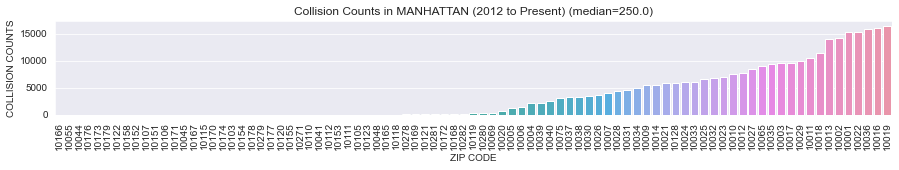

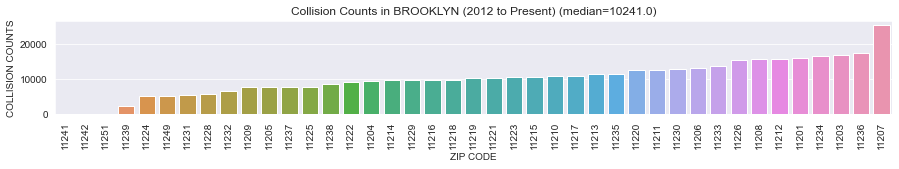

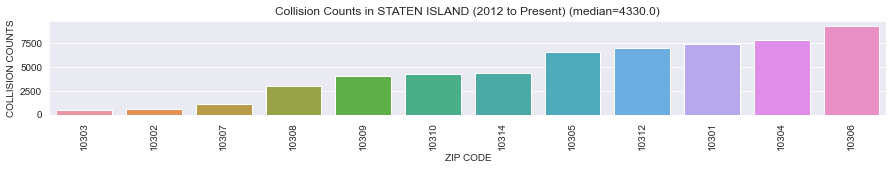

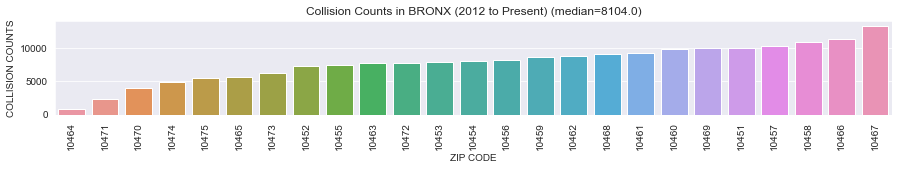

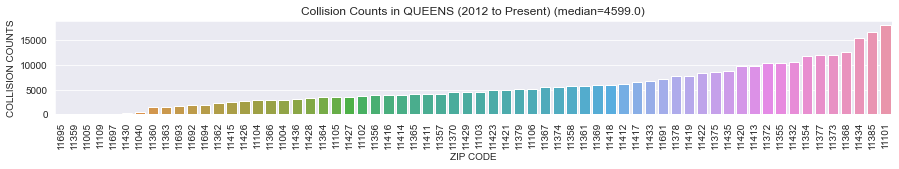

In [23]:
# Separate the graph into boroughs for better readability
sns.set_style(style = 'darkgrid')    
boroughs = ['MANHATTAN', 'BROOKLYN', 'STATEN ISLAND', 'BRONX', 'QUEENS']
for n in range(len(boroughs)):
    plt.figure(figsize = (15, 10))
    plt.subplot(5, 1, n + 1)
    borough_data = counts_per_zip_df[counts_per_zip_df['BOROUGH'] == boroughs[n]]
    borough_data = borough_data.sort_values(by = ['COLLISION COUNTS'])
    borough_data['ZIP CODE'] = borough_data['ZIP CODE'].astype('str')
    
    med_collision = borough_data['COLLISION COUNTS'].median()
    
    bar = sns.barplot(data = borough_data, x = 'ZIP CODE', y = 'COLLISION COUNTS')
    for code in bar.get_xticklabels():
        code.set_rotation(90)
    plt.title(f'Collision Counts in {boroughs[n]} (2012 to Present) (median={med_collision})')

The graphs tell an interesting story here. In every borough, motor crash rate varies widely across the neighborhoods. Since July 2012, some zip codes have less than 1000 crashes, such as 10303 in Staten Island, while some zip codes have more than 15,000 crashes, such as 11385 in Queens. Manhattan is especially interesting, as its median crash frequency is 250 even though it's maximum crash frequency at a zip code is over 15,000.

Based on these data, the city can investigate the reasons for such high crash rates in "high-crash" zip codes, such as 10019 and 11101 with over 15,000 crashes since July 2012. The city can then propose traffic initiatives to decrease the frequency of crashes in these neighborhoods. Additionally, more standby ambulances can be positioned near these high-crash zip codes in case of motor collisions.

## Crash Rates by Time of Day and Year
Out of curiosity, let's visualize the frequency of collisions over the course of a day.

In [24]:
# Need to split the time into hours and minutes, and insert them as columns in the dataset
hours = []
minutes = []
for time in dataset['CRASH TIME']:
    time = time.split(':')
    hours.append(time[0])

In [25]:
for time in dataset['CRASH TIME']:
    time = time.split(':')
    minutes.append(time[1])

In [26]:
dataset.insert(2, 'HOURS', hours)

In [27]:
dataset.insert(3, 'MINUTES', minutes)

In [28]:
dataset.head()

,CRASH DATE,CRASH TIME,HOURS,MINUTES,BOROUGH,ZIP CODE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,06/29/2022,6:55,6,55,NaN,0,0.0,0.0,0,0,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
1,06/30/2022,0:17,0,17,BROOKLYN,11207,1.0,0.0,0,0,...,NaN,NaN,NaN,NaN,4542062,Taxi,NaN,NaN,NaN,NaN
2,04/14/2021,5:32,5,32,NaN,0,0.0,0.0,0,0,...,Unspecified,NaN,NaN,NaN,4407480,Sedan,Sedan,NaN,NaN,NaN
3,06/29/2022,7:00,7,00,NaN,0,0.0,0.0,0,0,...,Unspecified,Unspecified,NaN,NaN,4542269,Sedan,Sedan,Bus,NaN,NaN
4,04/13/2021,21:35,21,35,BROOKLYN,11217,1.0,0.0,1,0,...,NaN,NaN,NaN,NaN,4407147,Sedan,NaN,NaN,NaN,NaN


In [29]:
# Count the number of collisions in each hour of the day
dataset['HOURS'] = dataset['HOURS'].astype('int64')
counts_per_hour = {}
for hour in dataset['HOURS'].unique():
    counts_per_hour[hour] = len(dataset[dataset['HOURS'] == hour])

In [30]:
counts_per_hour_df = pd.DataFrame({'HOURS': list(counts_per_hour.keys()), 'COLLISION COUNTS': list(counts_per_hour.values())})

In [31]:
counts_per_hour_df = counts_per_hour_df.sort_values(by = 'HOURS')

In [32]:
counts_per_hour_df.head()

,HOURS,COLLISION COUNTS
1,0,60498
19,1,32437
22,2,24806
20,3,21616
23,4,24535


Text(0.5, 1.0, 'Total Collision Counts by Hour (2012 to Present)')

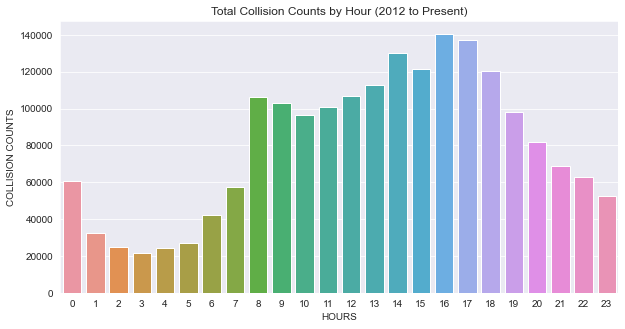

In [33]:
sns.set_style(style = 'darkgrid')    
plt.figure(figsize = (10, 5))
sns.barplot(data = counts_per_hour_df, x = 'HOURS', y = 'COLLISION COUNTS')
plt.title('Total Collision Counts by Hour (2012 to Present)')

As expected, crash collision frequencies vary thoughout the day. Crash rates are the lowest in late night between 1 to 4 AM. The bar graphs show minor peaks at 8 to 9 AM, 2 PM, and 4 PM. The early morning commute to work and evening commute back home are likely the causes of the higher peaks at 8 to 9 AM and 4 PM. But the 2 PM peak's cause is unclear. Perhaps it's due to commutes to lunches? 

Interestingly, the crash rates peak in the late afternoon and evening time between 3 and 6 PM. As the day progress, more traffic flow is expected, thus resulting in more potential for collisions, especially during the typical commute back home time.

Let's see if there are any discrepancies among the boroughs.

In [34]:
hours_borough = dataset.loc[:, ['BOROUGH', 'HOURS', 'COLLISION_ID']]

In [35]:
hours_borough = hours_borough.dropna(axis = 0)

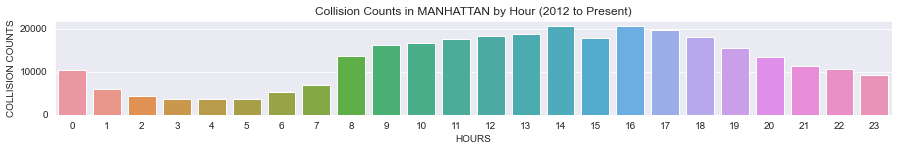

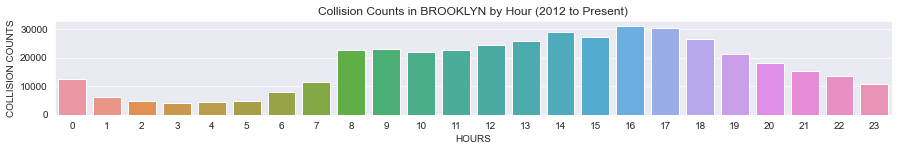

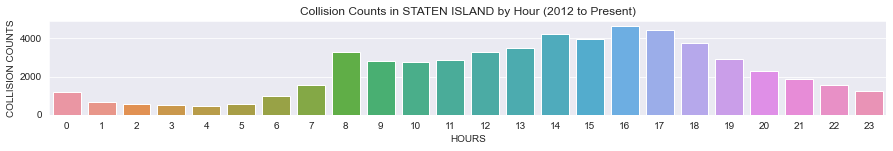

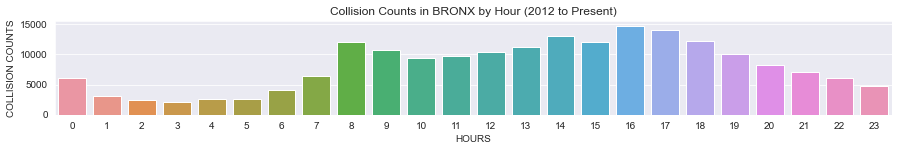

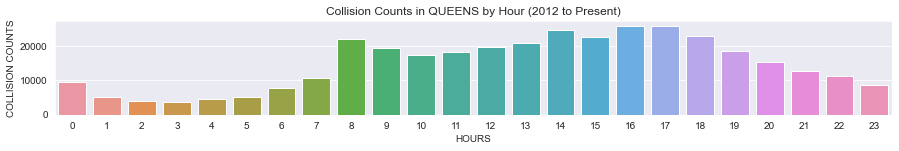

In [36]:
boroughs = ['MANHATTAN', 'BROOKLYN', 'STATEN ISLAND', 'BRONX', 'QUEENS']
sns.set_style(style = 'darkgrid')    
for n in range(len(boroughs)):
    plt.figure(figsize = (15, 10))
    plt.subplot(5, 1, n + 1)
    
    borough_data = hours_borough[hours_borough['BOROUGH'] == boroughs[n]]
    
    counts_per_hour = {}
    for hour in borough_data['HOURS'].unique():
        counts_per_hour[hour] = len(borough_data[borough_data['HOURS'] == hour])
    counts_per_hour_df = pd.DataFrame({'HOURS': list(counts_per_hour.keys()), 'COLLISION COUNTS': list(counts_per_hour.values())})
    
    bar = sns.barplot(data = counts_per_hour_df, x = 'HOURS', y = 'COLLISION COUNTS')
    plt.title(f'Collision Counts in {boroughs[n]} by Hour (2012 to Present)')

No discrepancies are found among the boroughs in terms of crash rates by the time of day.

Let's compare crash rates by month.

In [37]:
months = []
years = []
for date in dataset['CRASH DATE']:
    date = date.split('/')
    months.append(date[0])

In [38]:
for date in dataset['CRASH DATE']:
    date = date.split('/')
    years.append(date[2])

In [39]:
dataset.insert(1, 'YEARS', years)

In [40]:
dataset.insert(2, 'MONTHS', months)

In [41]:
dataset['YEARS'] = dataset['YEARS'].astype('int64')
dataset['MONTHS'] = dataset['MONTHS'].astype('int64')

In [42]:
dataset.head()

,CRASH DATE,YEARS,MONTHS,CRASH TIME,HOURS,MINUTES,BOROUGH,ZIP CODE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,06/29/2022,2022,6,6:55,6,55,NaN,0,0.0,0.0,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
1,06/30/2022,2022,6,0:17,0,17,BROOKLYN,11207,1.0,0.0,...,NaN,NaN,NaN,NaN,4542062,Taxi,NaN,NaN,NaN,NaN
2,04/14/2021,2021,4,5:32,5,32,NaN,0,0.0,0.0,...,Unspecified,NaN,NaN,NaN,4407480,Sedan,Sedan,NaN,NaN,NaN
3,06/29/2022,2022,6,7:00,7,00,NaN,0,0.0,0.0,...,Unspecified,Unspecified,NaN,NaN,4542269,Sedan,Sedan,Bus,NaN,NaN
4,04/13/2021,2021,4,21:35,21,35,BROOKLYN,11217,1.0,0.0,...,NaN,NaN,NaN,NaN,4407147,Sedan,NaN,NaN,NaN,NaN


[2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022]


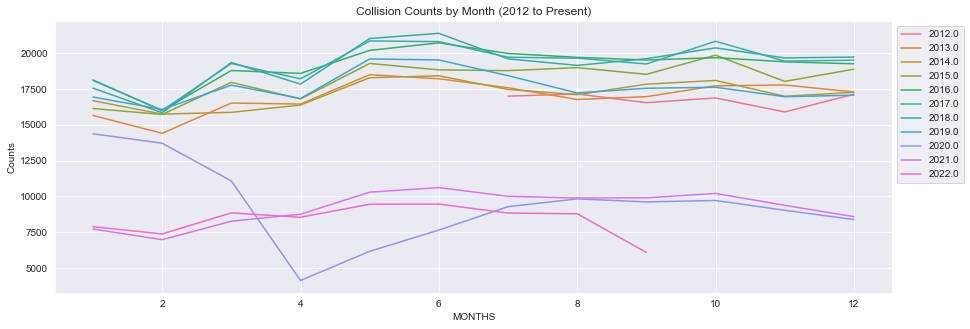

In [43]:
crash_by_month = dataset.loc[:, ['YEARS', 'MONTHS', 'COLLISION_ID']]

counts_per_month_df = pd.DataFrame({'YEARS': [], 'MONTHS': [], 'COLLISION COUNTS': []})

years = np.sort(dataset.YEARS.unique())
print(years)
for year in years:
    yearly_data = dataset[dataset['YEARS'] == year]
    
    subset = {} 
    for month in yearly_data.MONTHS.unique():
        subset[month] = len(yearly_data[yearly_data['MONTHS'] == month])

    subset_df = pd.DataFrame({'YEARS': [year for n in range(len(subset.keys()))], 'MONTHS': subset.keys(), 
                              'COLLISION COUNTS': subset.values()})
    counts_per_month_df = pd.concat([counts_per_month_df, subset_df], axis = 0)

counts_per_month_df.index = list(range(0, len(counts_per_month_df)))
counts_per_month_df['YEARS'] = counts_per_month_df['YEARS'].astype('str')


plt.figure(figsize = (15, 5))
sns.set_style(style = 'darkgrid')    
sns.lineplot(data = counts_per_month_df, x = 'MONTHS', y = 'COLLISION COUNTS', hue = 'YEARS')
plt.title(f'Collision Counts by Month (2012 to Present)')
plt.ylabel('Counts')
plt.legend(bbox_to_anchor = (1,1))

Before 2020, the number of monthly vehicle collisions ranged from ~14,000 to ~21,500. However, vehicle crashes plummeted starting in 2020, especially in April of 2020 when COVID-19 hit NYC. COVID-19's effect on the economy and society as a whole likely reduced the number of drivers, thus reducing crash rates. The impacts of COVID-19 are still apparent, as the crash rates from 2021 to present are still nowhere near the historical rates from 2012 to 2019.

It is interesting that collision rates are the lowest in February followed by gradual increases until June. Perhaps the cold winters make people less willing to travel, while the refreshing springtime encourage more travels.

## Predicting Number of Casualities
Based on the visualizations thus, we can see that there are clear patterns in crash rates based on time and zip codes. I wonder whether it's possible to predict the number of casualities (injured plus fatalities) based on a crash's time and zip code.

In [44]:
casualities = dataset[['NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED']]

In [45]:
casualities.head()

,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED
0,0.0,0.0
1,1.0,0.0
2,0.0,0.0
3,0.0,0.0
4,1.0,0.0


In [46]:
# Insert casualities column into dataset
combined = dataset['NUMBER OF PERSONS INJURED'] + dataset['NUMBER OF PERSONS KILLED']
dataset.insert(10, 'NUMBER OF CASUALITIES', combined)

I used Kaggle's Intro to Machine Learning [course](https://www.kaggle.com/learn/intro-to-machine-learning) to help write this code for a random forest model.

In [47]:
# Set up training and validation data
model_data = dataset[['HOURS', 'ZIP CODE', 'MONTHS', 'NUMBER OF CASUALITIES']] 
model_data = model_data.dropna()
casuality_counts = model_data['NUMBER OF CASUALITIES']
variables = model_data[['HOURS', 'ZIP CODE', 'MONTHS']]

In [48]:
train_variables, val_variables, train_casuality, val_casuality = train_test_split(variables, casuality_counts)

In [49]:
# Use a random forest regressor with infinite leaf nodes
model = RandomForestRegressor()
model.fit(train_variables, train_casuality)

RandomForestRegressor()

In [50]:
guesses = model.predict(val_variables)
print(mean_absolute_error(val_casuality, guesses))

0.4515582126263958


In [51]:
for value in combined.unique():
    print(f'Percentage of {value} casualities is {list(combined).count(value)/len(combined)*100}%')

Percentage of 0.0 casualities is 78.42015380766428%
Percentage of 1.0 casualities is 16.732371867089544%
Percentage of 7.0 casualities is 0.02765989517210515%
Percentage of 2.0 casualities is 3.1540568105240205%
Percentage of 3.0 casualities is 1.0332576571032839%
Percentage of 5.0 casualities is 0.15238841122908867%
Percentage of 6.0 casualities is 0.0619498775764752%
Percentage of 4.0 casualities is 0.3872385324094721%
Percentage of 9.0 casualities is 0.00616390922374628%
Percentage of 10.0 casualities is 0.003884816737655218%
Percentage of 14.0 casualities is 0.00046617800851862616%
Percentage of 8.0 casualities is 0.011291867317451167%
Percentage of 17.0 casualities is 0.0002589877825103479%
Percentage of 40.0 casualities is 5.179755650206957e-05%
Percentage of 13.0 casualities is 0.001087748686543461%
Percentage of 16.0 casualities is 0.00041438045201655656%
Percentage of nan casualities is 0.0%
Percentage of 11.0 casualities is 0.0022272949295889916%
Percentage of 15.0 casualitie

The mean absolute error is ~0.45. Based on the data, it's not suitable to use a random forest model. The majority of the number of casualities per crash is 0 or 1. Thus, the model will likely produce a number between 0 and 1. Rather than using a model to predict casualities, it's better to use mode or median to calculate it. Machine learning has the capacity for revolutionary analyses, but simple statistics can also do the trick, depending on the context.

## Main Findings
The motor collisions dataset provides valuable insight for improving traffic safety. The graphs of collision frequency among the zip codes reveal "high-crash" neighborhoods in every borough. These graphs illustrate the need for more ambulances and traffic controllers in those areas to increase the efficiency of emergency medical care and prevent further life-threatening crashes. Additionally, the graphs of collision frequency over time indicate that standby ambulances and traffic controllers are needed in the early morning during commutes to work and even more later in the day, especially in the evening time during commutes back home. Lastly, the average number of casualities per collision is less than 1 since July 2012. This can be determined using simple statistics or a random forest model. 

As a side note, I appreciate the power of machine learning models to enhance statistical analysis. At the same time, it is important for people to understand that machine learning models are not always needed for every analysis, despite the media coverage of its applications in data science. The proper tool for an analysis depends on the context of the problem.

## References
I consulted the following resources to help write the code in this analysis.

Kaggle. "Intro to Machine Learning". Available at https://www.kaggle.com/learn/intro-to-machine-learning

Matplotlib documentation. Available at https://matplotlib.org/stable/index.html

Numpy documentation. Available at https://numpy.org/doc/stable/index.html

Pandas documentation. Available at https://pandas.pydata.org/docs/

Python documentation. Available at https://docs.python.org/3/contents.html

Scikit-learn documentation. Available at https://scikit-learn.org/stable/index.html

Seaborn documentation. Available at https://seaborn.pydata.org/

Here is the citation for the dataset and the list of NYC zip codes:

NYC OpenData. (9/27/2022). "Motor Vehicle Collisions - Crashes". Available at https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Crashes/h9gi-nx95

Bklyndesigns. "The Complete New York City Zip Code List and Map". Available at https://bklyndesigns.com/new-york-city-zip-code/

Note that the dataset updates on a daily basis. The dataset used for this analysis was downloaded on 9/27/2022.